In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

train=pd.read_csv('mnist_train.csv',header=None)
x = train.iloc[:, 1:-1].values
y = train.iloc[:,0].values


In [3]:
xtrain=sc.fit_transform(x)


In [4]:
svd = TruncatedSVD(n_components=750)

In [5]:
svd.fit(xtrain)
xnew=svd.fit_transform(xtrain)


In [6]:
var=svd.explained_variance_ratio_
var

array([5.80752595e-02, 8.24608842e-02, 7.09493297e-02, 6.11602942e-02,
       5.28280164e-02, 4.31896747e-02, 3.62642677e-02, 2.91064698e-02,
       2.87864864e-02, 2.36294440e-02, 2.12486517e-02, 2.05027232e-02,
       1.71601864e-02, 1.70520509e-02, 1.59039383e-02, 1.48921240e-02,
       1.36393484e-02, 1.29534867e-02, 1.18940835e-02, 1.15274210e-02,
       1.06622327e-02, 1.00692655e-02, 9.54465597e-03, 9.14562496e-03,
       8.84196251e-03, 8.39950958e-03, 8.14253525e-03, 7.86414080e-03,
       7.44746055e-03, 6.90961423e-03, 6.58415979e-03, 6.48321500e-03,
       6.02919870e-03, 5.90400495e-03, 5.70112645e-03, 5.44270555e-03,
       5.05781437e-03, 4.87854544e-03, 4.81450430e-03, 4.72627186e-03,
       4.57265123e-03, 4.44908522e-03, 4.20105853e-03, 3.98273835e-03,
       3.85456512e-03, 3.75192771e-03, 3.62084762e-03, 3.51740959e-03,
       3.40746779e-03, 3.22952789e-03, 3.20430884e-03, 3.13214250e-03,
       2.96023876e-03, 2.92153611e-03, 2.84216747e-03, 2.71758952e-03,
      

In [7]:
#I am defining a function that calculates the number of components to explain a specific variance for the ease of this task

def select_n_components(exp_var_ratio, target_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in exp_var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= target_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [8]:
select_n_components(var,0.90)

87

    For over 90% explained variance in the data, we need to consider > 87 dimensions, i.e. 88 components

    Starting SVD on test set

In [7]:
test=pd.read_csv('mnist_test.csv',header=None)
X1 = test.iloc[:, 1:-1].values
Y1= test.iloc[:,0].values
Xtest=sc.fit_transform(X1)
A=np.unique(Y1)

In [8]:
svdT = TruncatedSVD(n_components=2)

In [9]:
svdT.fit(Xtest)
X_fitted=svdT.fit_transform(Xtest)

In [20]:
yunique=np.unique(Y1)

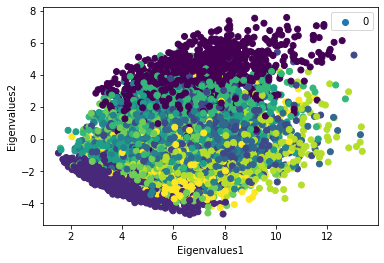

In [22]:
# Lets plot the point on a graph
plt.scatter(X_fitted[:,0],X_fitted[:,1],c=Y1)

plt.xlabel('Eigenvalues1')
plt.ylabel('Eigenvalues2')
plt.legend(yunique[:])
plt.show()

Logistics Regression on test data with and without dimensionality reduction

In [9]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test, y_train, y_test = train_test_split(Xtest,Y1,test_size=0.3, random_state=1)
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
#Making predictions and testing the accuracy vs the labels
prediction1=lr.predict(x_test)
score1=lr.score(x_test, y_test)
print(score1)

0.9093333333333333


In [50]:
#Applying the same to the data retrieved after SVD
x_train, x_test, y_train, y_test = train_test_split(X_fitted,Y1,test_size=0.3, random_state=1)
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
prediction2=lr.predict(x_test)
score2=lr.score(x_test, y_test)
print(score2)

0.344


For the Logistic regression model, the accuracy for the full test set is 90.93% but the SVD reduced model is only 34.4%.
Thus Logistic regression is not very accurate with dimentionally reduced data. 

Lets try KNN on both the sets now.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()

In [54]:
#Prediction using the full test set
x_train, x_test, y_train, y_test = train_test_split(Xtest,Y1,test_size=0.3, random_state=1)
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [56]:
predict=KNN.predict(x_test)
score3=KNN.score(x_test, y_test)
print(score3)

0.951


In [57]:
#now trying for SVD reduced test set
x_train, x_test, y_train, y_test = train_test_split(X_fitted,Y1,test_size=0.3, random_state=1)
KNN.fit(x_train, y_train)
predict=KNN.predict(x_test)
score4=KNN.score(x_test, y_test)
print(score4)

0.324


The reduced set has an accuracy of 32.4% while the full set is 95.1% accurate with the predictions.

Lets try the Naive Bayes classifier now

In [12]:
from sklearn.naive_bayes import MultinomialNB
naivebayes=MultinomialNB()

In [13]:
#Prediction using the full test set with Naive Bayes
x_train, x_test, y_train, y_test = train_test_split(Xtest,Y1,test_size=0.3, random_state=1)
naivebayes.fit(x_train, y_train)
pred=naivebayes.predict(x_test)
score4=naivebayes.score(x_test, y_test)
print(score4)

0.8366666666666667


83.67% accuracy for the Naive bayes model

In [21]:
#applying the same for the SVD reduced dataset, doesnt execute because of the -ve values present in the data. So I will be using Gaussian NB instead
from sklearn.naive_bayes import GaussianNB
gasnb=GaussianNB()
x_train, x_test, y_train, y_test = train_test_split(X_fitted,Y1,test_size=0.3, random_state=1)
gasnb.fit(x_train, y_train)
pred=gasnb.predict(x_test)
score5=gasnb.score(x_test, y_test)
print(score5)

0.3416666666666667


The classifiers are not very accurate with the reduced set but all three seem to work well with the full set. KNN is the best out of the three in terms of making the best prediction though.